# Notebook for Curface Creek Sandstone pmag compilation

## import packages

In [1]:
import numpy as np
import pandas as pd
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib as mpl
from matplotlib import cm

%config InlineBackend.figure_format = 'retina'

In [2]:
# read in magic tables

Cutface_specimens = pd.read_csv('../data/Pmag/2020_thermal_demag_1/specimens.txt', sep='\t', header=1)
Cutface_sites = pd.read_csv('../data/Pmag/2020_thermal_demag_1/sites.txt', sep='\t', header=1)

display(Cutface_specimens.head())
# display(Cutafce_sites.head())

,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,...,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,location,site,specimen_name
0,CF-10a,NaN,CF-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,This study,LP-NOMAG,NaN,NaN,NaN,Cutface Creek,CF,NaN
1,CF-10a,CF-10a_LP-DIR-T,CF-10,NaN,mt,290.1,40.1,3.0,9.0,100.0,...,pmagpy-4.2.50: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,Cutface Creek,CF,CF-10a
2,CF-10a,CF-10a_LP-DIR-T,CF-10,NaN,ht,293.1,28.8,3.0,9.0,0.0,...,pmagpy-4.2.50: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Cutface Creek,CF,CF-10a
3,CF-10a,CF-10a_LP-DIR-T,CF-10,NaN,lt,3.9,69.6,3.0,3.0,0.0,...,pmagpy-4.2.50: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Cutface Creek,CF,CF-10a
4,CF-10a,CF-10a_LP-DIR-T,CF-10,NaN,mt,296.2,34.2,3.0,9.0,0.0,...,pmagpy-4.2.50: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Cutface Creek,CF,CF-10a


## first plot site mean directions of differnt components

In [3]:
# filter site level data by component and tilt correction
Cutface_sites_lt = Cutface_sites[(Cutface_sites['dir_comp_name']=='lt') & (Cutface_sites['dir_tilt_correction']==100)]
Cutface_sites_mt = Cutface_sites[(Cutface_sites['dir_comp_name']=='mt') & (Cutface_sites['dir_tilt_correction']==100)]
Cutface_sites_ht = Cutface_sites[(Cutface_sites['dir_comp_name']=='ht') & (Cutface_sites['dir_tilt_correction']==100)]

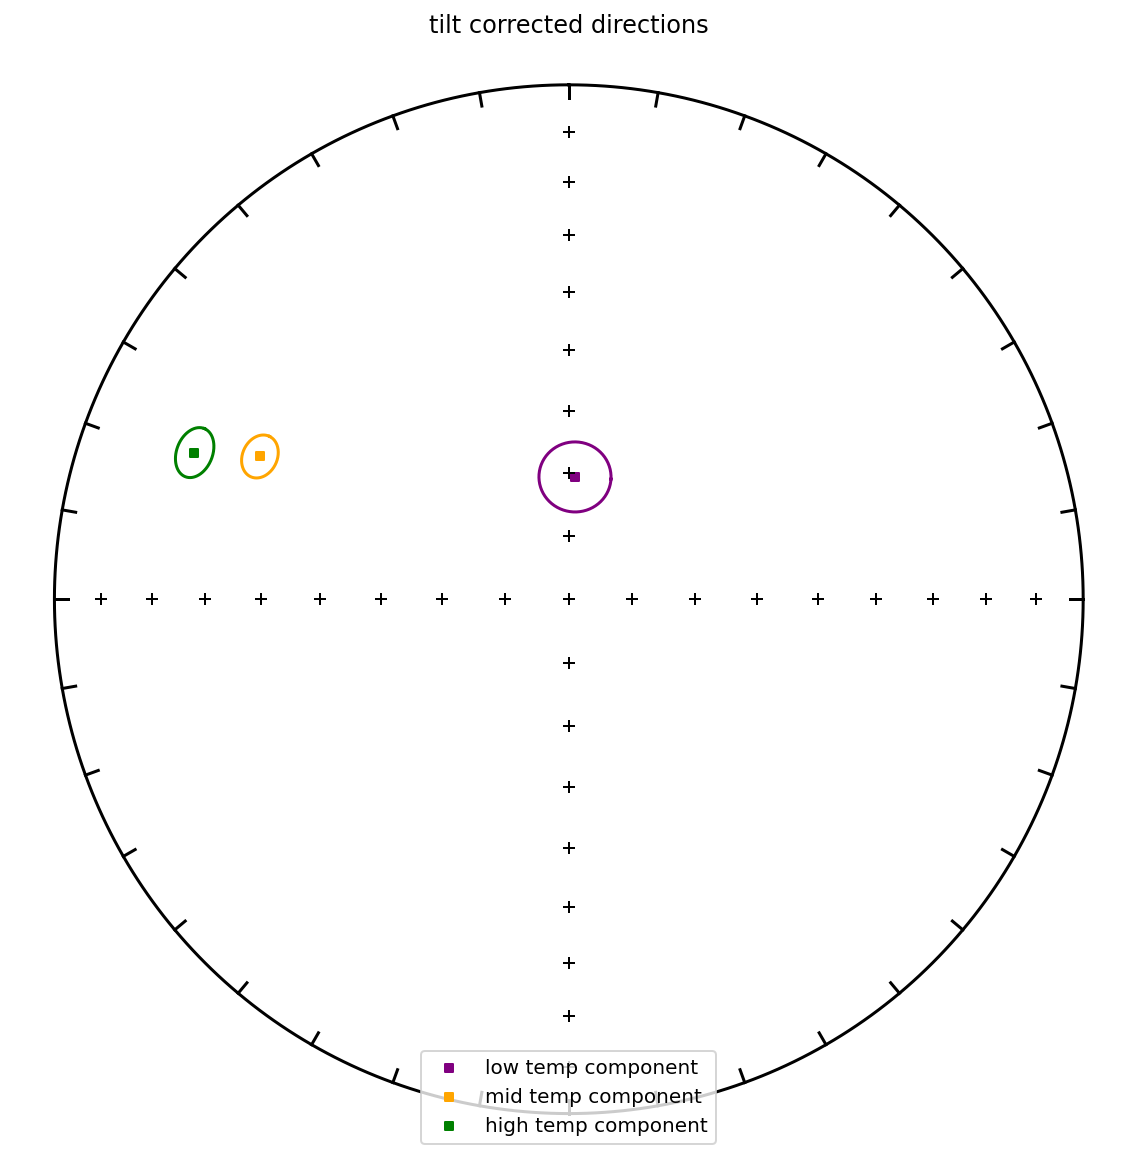

In [4]:
# pre tilt correction site mean directions
fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(Cutface_sites_lt['dir_dec'].tolist()[0],Cutface_sites_lt['dir_inc'].tolist()[0],Cutface_sites_lt['dir_alpha95'].tolist()[0],
                   color='purple', marker = 's', label='low temp component')
ipmag.plot_di_mean(Cutface_sites_mt['dir_dec'].tolist()[0],Cutface_sites_mt['dir_inc'].tolist()[0],Cutface_sites_mt['dir_alpha95'].tolist()[0],
                   color='orange', marker = 's', label='mid temp component')
ipmag.plot_di_mean(Cutface_sites_ht['dir_dec'].tolist()[0],Cutface_sites_ht['dir_inc'].tolist()[0],Cutface_sites_ht['dir_alpha95'].tolist()[0],
                   color='green', marker = 's', label='high temp component')

plt.legend(loc=8)
plt.title('tilt corrected directions')
plt.show()

## second plot specimen directions

In [5]:
Cutface_specimens_lt = Cutface_specimens[(Cutface_specimens['dir_comp']=='lt') & (Cutface_specimens['dir_tilt_correction']==100)]
Cutface_specimens_mt = Cutface_specimens[(Cutface_specimens['dir_comp']=='mt') & (Cutface_specimens['dir_tilt_correction']==100)]
Cutface_specimens_ht = Cutface_specimens[(Cutface_specimens['dir_comp']=='ht') & (Cutface_specimens['dir_tilt_correction']==100)]

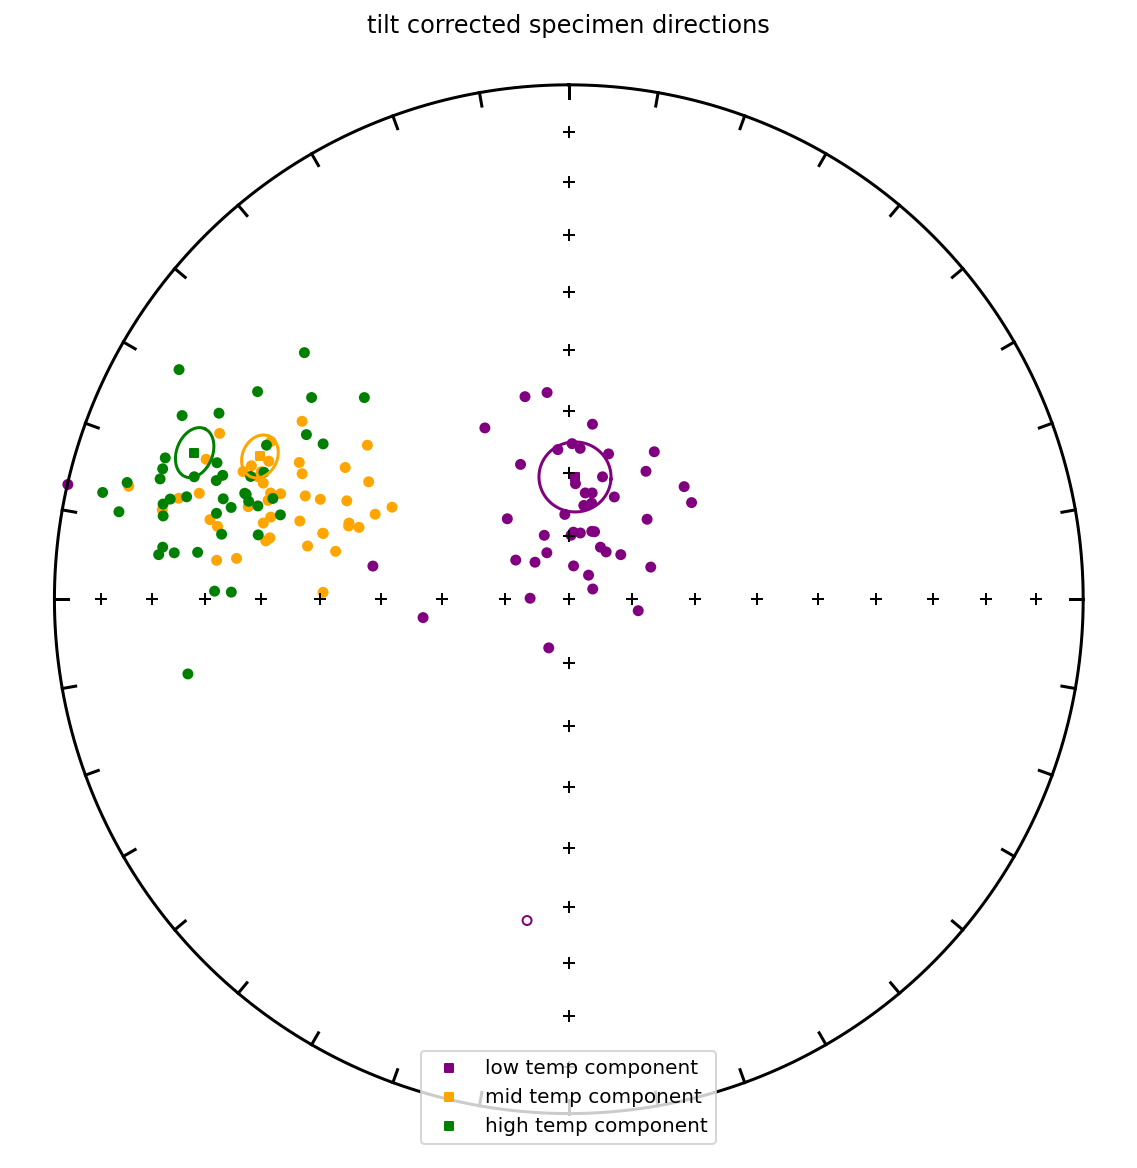

In [6]:
# pre tilt correction site mean directions
fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(fignum)

ipmag.plot_di(Cutface_specimens_lt['dir_dec'].tolist(),Cutface_specimens_lt['dir_inc'].tolist(),color='purple')
ipmag.plot_di(Cutface_specimens_mt['dir_dec'].tolist(),Cutface_specimens_mt['dir_inc'].tolist(),color='orange')
ipmag.plot_di(Cutface_specimens_ht['dir_dec'].tolist(),Cutface_specimens_ht['dir_inc'].tolist(),color='green')


ipmag.plot_di_mean(Cutface_sites_lt['dir_dec'].tolist()[0],Cutface_sites_lt['dir_inc'].tolist()[0],Cutface_sites_lt['dir_alpha95'].tolist()[0],
                   color='purple', marker = 's', label='low temp component')
ipmag.plot_di_mean(Cutface_sites_mt['dir_dec'].tolist()[0],Cutface_sites_mt['dir_inc'].tolist()[0],Cutface_sites_mt['dir_alpha95'].tolist()[0],
                   color='orange', marker = 's', label='mid temp component')
ipmag.plot_di_mean(Cutface_sites_ht['dir_dec'].tolist()[0],Cutface_sites_ht['dir_inc'].tolist()[0],Cutface_sites_ht['dir_alpha95'].tolist()[0],
                   color='green', marker = 's', label='high temp component')

plt.legend(loc=8)
plt.title('tilt corrected specimen directions')
plt.show()

## look at the mt and ht components in detail (unsquish by 0.6 ?!)

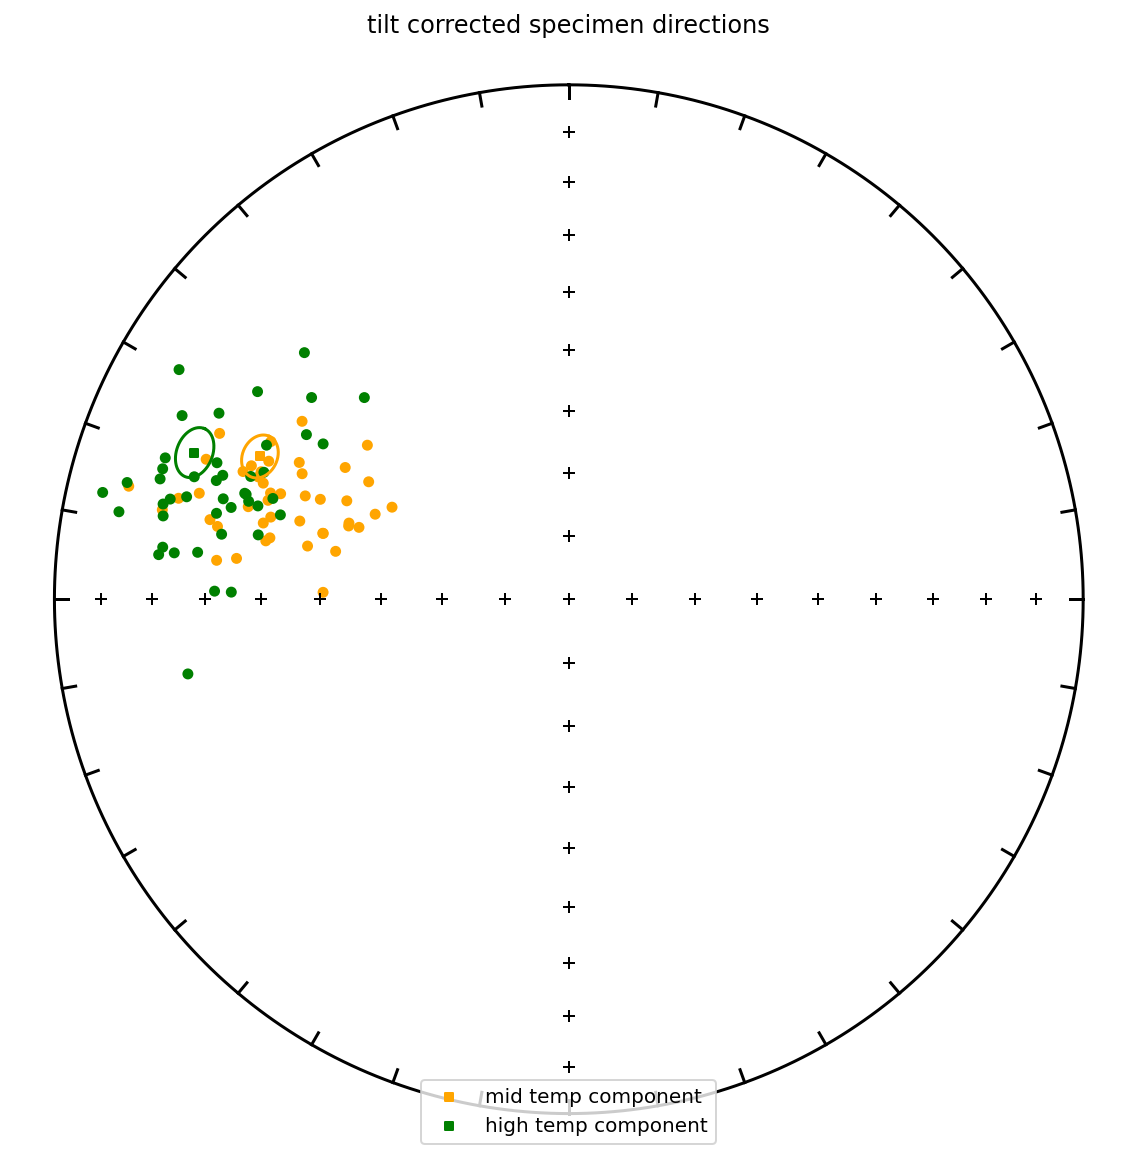

In [7]:
fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(fignum)

ipmag.plot_di(Cutface_specimens_mt['dir_dec'].tolist(),Cutface_specimens_mt['dir_inc'].tolist(),color='orange')
ipmag.plot_di(Cutface_specimens_ht['dir_dec'].tolist(),Cutface_specimens_ht['dir_inc'].tolist(),color='green')

ipmag.plot_di_mean(Cutface_sites_mt['dir_dec'].tolist()[0],Cutface_sites_mt['dir_inc'].tolist()[0],Cutface_sites_mt['dir_alpha95'].tolist()[0],
                   color='orange', marker = 's', label='mid temp component')
ipmag.plot_di_mean(Cutface_sites_ht['dir_dec'].tolist()[0],Cutface_sites_ht['dir_inc'].tolist()[0],Cutface_sites_ht['dir_alpha95'].tolist()[0],
                   color='green', marker = 's', label='high temp component')

plt.legend(loc=8)
plt.title('tilt corrected specimen directions')
plt.show()

In [8]:
unsquished_ht_incs = ipmag.unsquish(Cutface_specimens_ht['dir_inc'].tolist(), 0.6)

# calculate mean direction of high temp component after unsquishing
unsquished_ht_mean = ipmag.fisher_mean(dec=Cutface_specimens_ht['dir_dec'].tolist(), inc=unsquished_ht_incs)
unsquished_ht_mean

{'dec': 287.52576141114315,
 'inc': 41.254337639848046,
 'n': 44,
 'r': 42.81552098678615,
 'k': 36.30288043966932,
 'alpha95': 3.6207478211108044,
 'csd': 13.44356576945207}

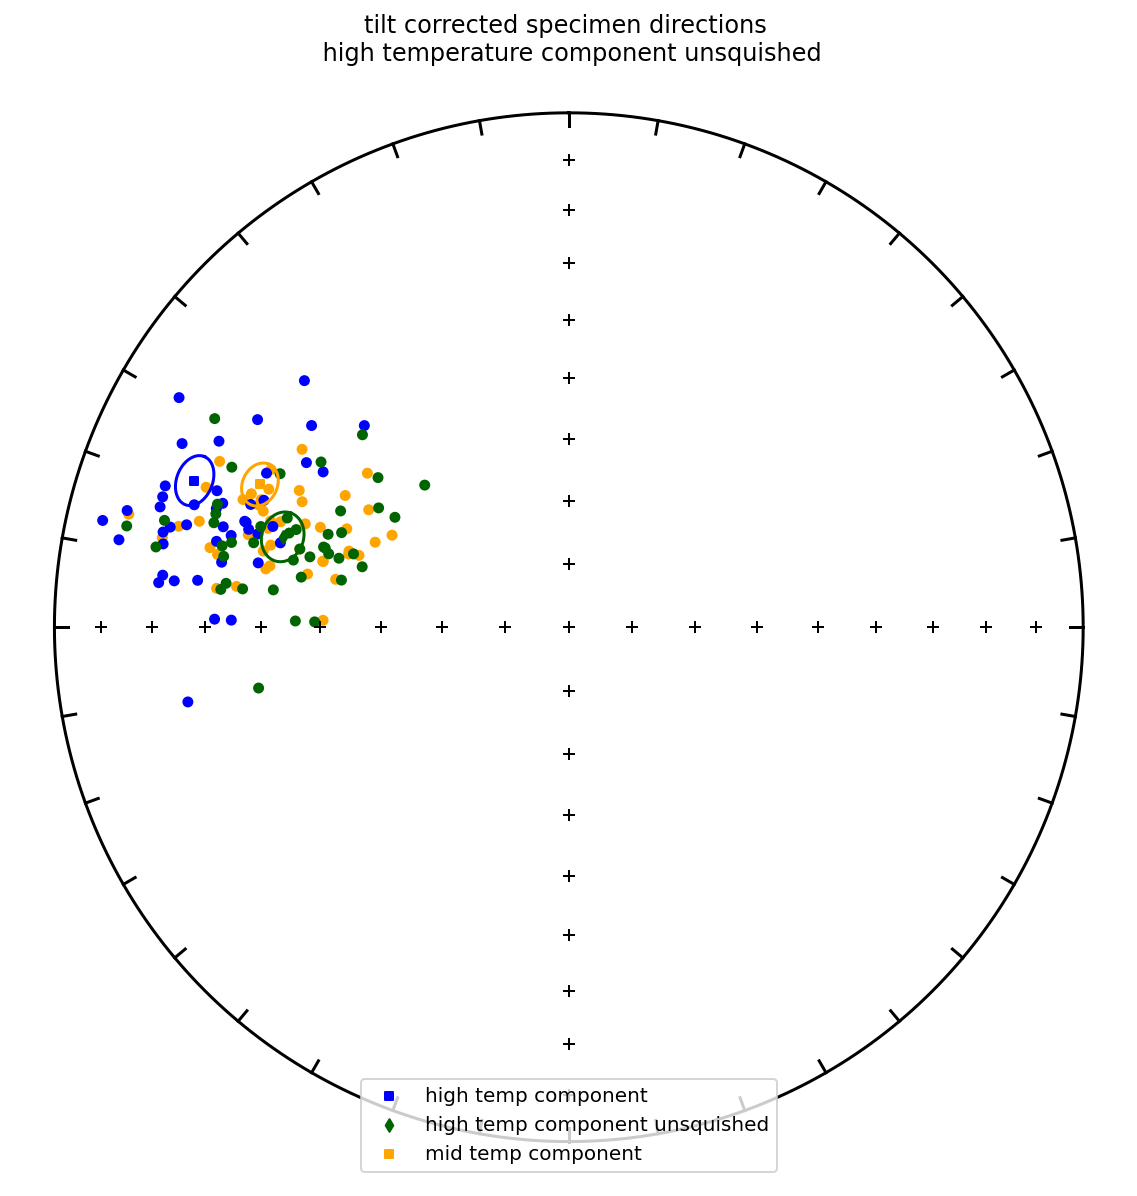

In [9]:
fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(fignum)

ipmag.plot_di(Cutface_specimens_mt['dir_dec'].tolist(),Cutface_specimens_mt['dir_inc'].tolist(),color='orange')
ipmag.plot_di(Cutface_specimens_ht['dir_dec'].tolist(),Cutface_specimens_ht['dir_inc'].tolist(),color='blue')
ipmag.plot_di(Cutface_specimens_ht['dir_dec'].tolist(),unsquished_ht_incs,color='darkgreen')


ipmag.plot_di_mean(Cutface_sites_ht['dir_dec'].tolist()[0],Cutface_sites_ht['dir_inc'].tolist()[0],Cutface_sites_ht['dir_alpha95'].tolist()[0],
                   color='blue', marker = 's', label='high temp component')
ipmag.plot_di_mean(unsquished_ht_mean['dec'],unsquished_ht_mean['inc'],unsquished_ht_mean['alpha95'],
                   color='darkgreen', marker = 'd', label='high temp component unsquished')
ipmag.plot_di_mean(Cutface_sites_mt['dir_dec'].tolist()[0],Cutface_sites_mt['dir_inc'].tolist()[0],Cutface_sites_mt['dir_alpha95'].tolist()[0],
                   color='orange', marker = 's', label='mid temp component')

plt.legend(loc=8)
plt.title('tilt corrected specimen directions \n high temperature component unsquished')
plt.show()

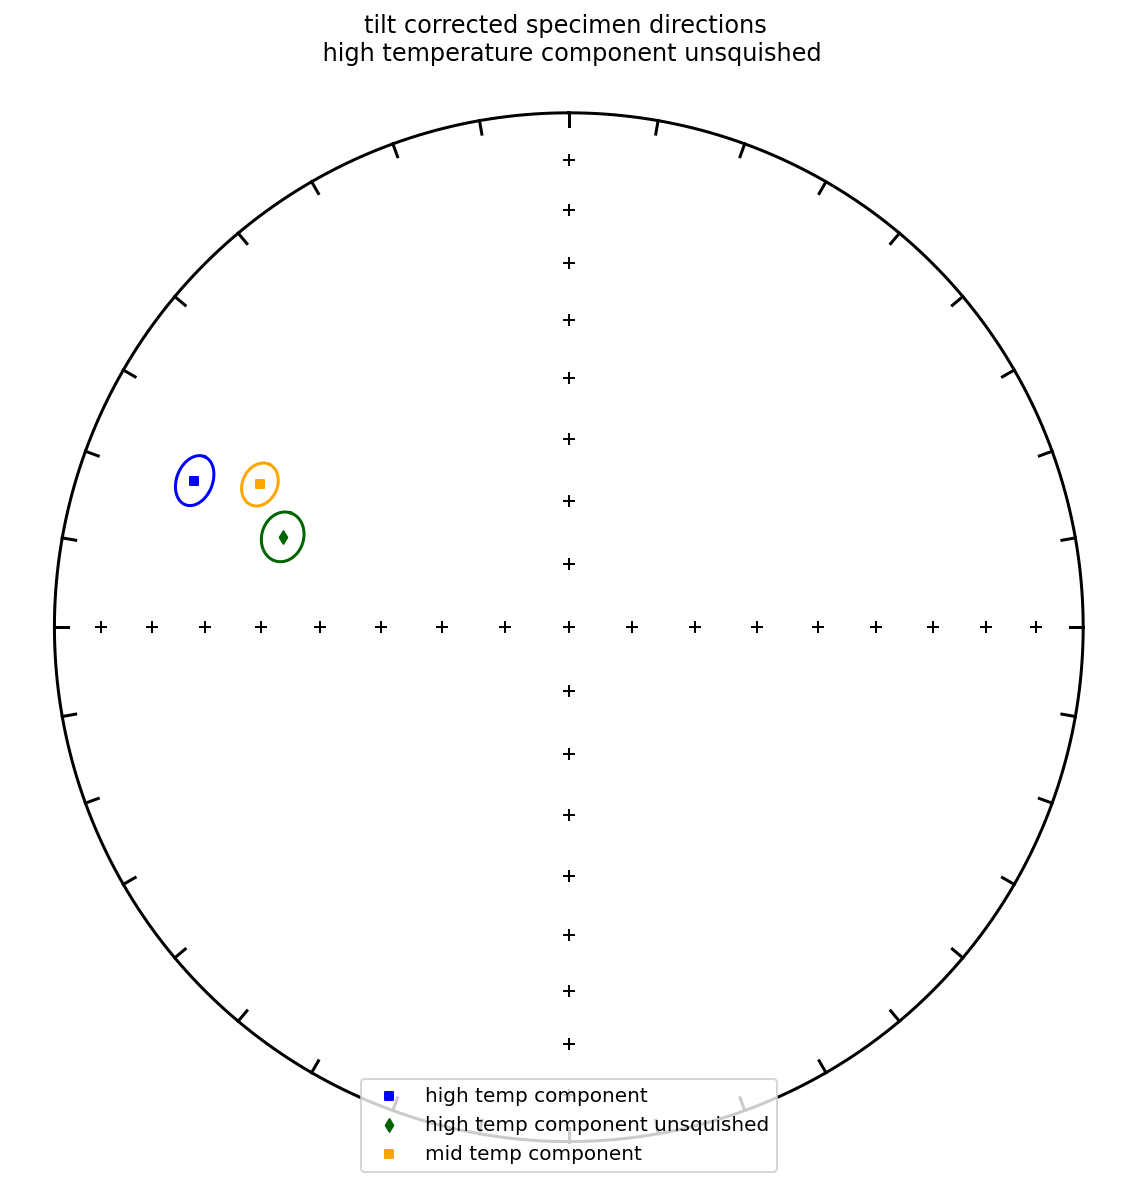

In [10]:
fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(Cutface_sites_ht['dir_dec'].tolist()[0],Cutface_sites_ht['dir_inc'].tolist()[0],Cutface_sites_ht['dir_alpha95'].tolist()[0],
                   color='blue', marker = 's', label='high temp component')
ipmag.plot_di_mean(unsquished_ht_mean['dec'],unsquished_ht_mean['inc'],unsquished_ht_mean['alpha95'],
                   color='darkgreen', marker = 'd', label='high temp component unsquished')
ipmag.plot_di_mean(Cutface_sites_mt['dir_dec'].tolist()[0],Cutface_sites_mt['dir_inc'].tolist()[0],Cutface_sites_mt['dir_alpha95'].tolist()[0],
                   color='orange', marker = 's', label='mid temp component')

plt.legend(loc=8)
plt.title('tilt corrected specimen directions \n high temperature component unsquished')
plt.show()

## let's try different unsquishing factors

In [11]:
def unsquish_factors(decs, incs, n=5):
    # this function explores different unsquishing factors upon CF ht directions
    fignum = 1
    plt.figure(num=fignum,figsize=(8,8))
    ipmag.plot_net(fignum)
    factors = np.linspace(0.1,1, num=n)
    
    undquished_mean_list = [] 
    for i in range(len(factors)):
        unsquished_incs = ipmag.unsquish(incs , factors[i])
        unsquished_mean = ipmag.fisher_mean(decs, unsquished_incs)
        undquished_mean_list.append(unsquished_mean)
        ipmag.plot_di_mean(unsquished_mean['dec'],unsquished_mean['inc'],unsquished_mean['alpha95'],
                   color='C'+str(i), marker = 'd', label='high temp component unsquished with factor '+str(round(factors[i], 1)))
    plt.legend(loc=8)
    return undquished_mean_list
# calculate mean direction of high temp component after unsquishing


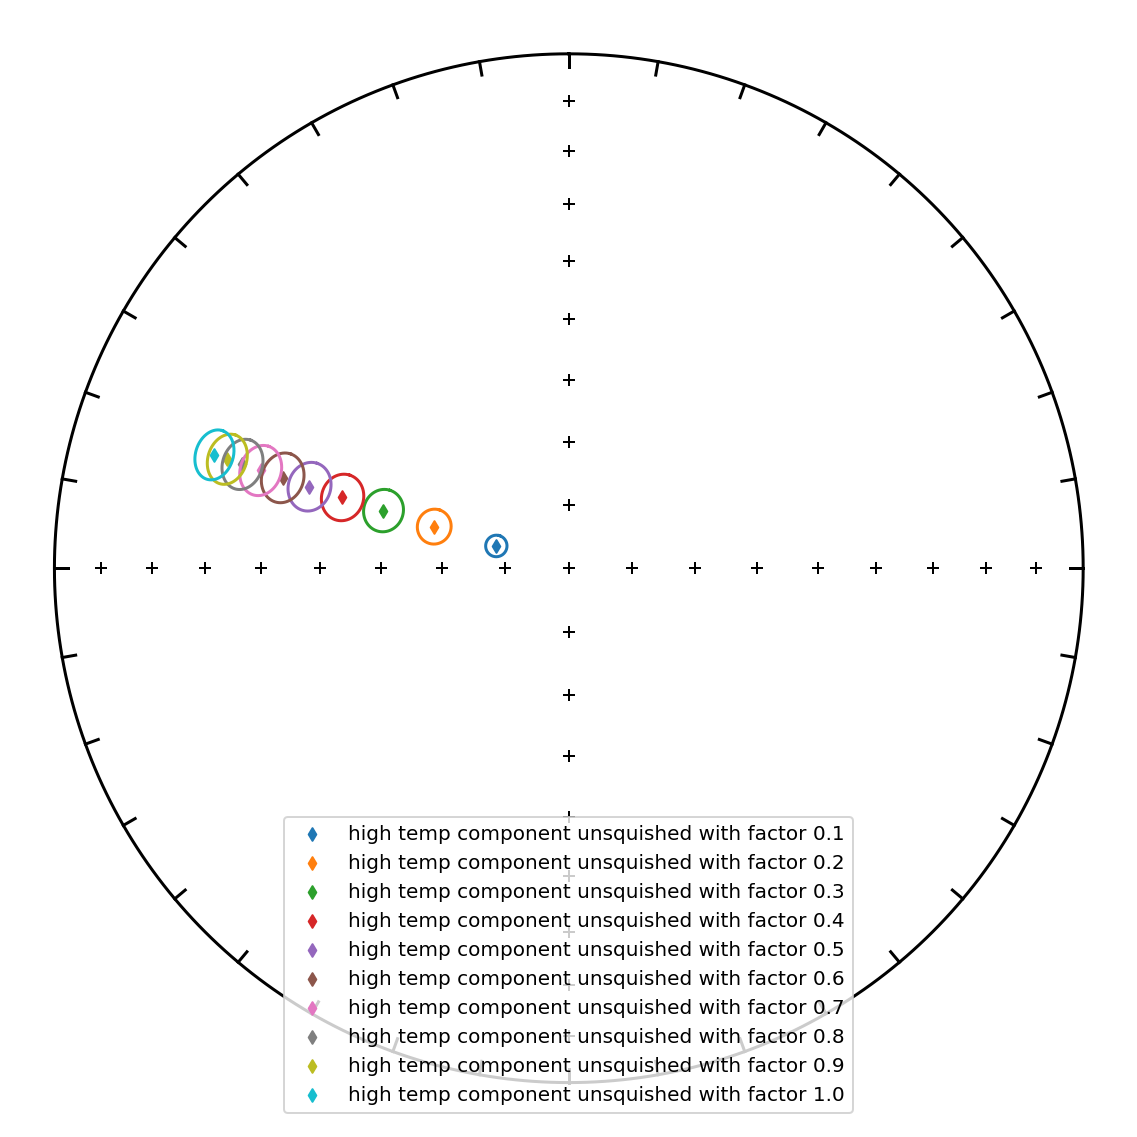

In [12]:
CF_undquished_mean_list = unsquish_factors(Cutface_specimens_ht['dir_dec'].tolist(), Cutface_specimens_ht['dir_inc'].tolist(), n=10) 

In [13]:
CF_undquished_mean_list[:5]

[{'dec': 287.0634484195563,
  'inc': 78.03519967810185,
  'n': 44,
  'r': 43.73644449218302,
  'k': 163.1534865507728,
  'alpha95': 1.6896353626560554,
  'csd': 6.341424692810475},
 {'dec': 287.1696276758545,
  'inc': 67.66509490190727,
  'n': 44,
  'r': 43.32957948122903,
  'k': 64.13884837359801,
  'alpha95': 2.707601623974303,
  'csd': 10.114034715412318},
 {'dec': 287.2696935217548,
  'inc': 59.04722166912394,
  'n': 44,
  'r': 43.04690063329484,
  'k': 45.11596744487396,
  'alpha95': 3.2390594737611016,
  'csd': 12.05923842031355},
 {'dec': 287.3637112858843,
  'inc': 51.94923620518065,
  'n': 44,
  'r': 42.89407835756818,
  'k': 38.881597348476774,
  'alpha95': 3.495375190478601,
  'csd': 12.990114216153929},
 {'dec': 287.4497196255652,
  'inc': 46.09972571626441,
  'n': 44,
  'r': 42.82910488959989,
  'k': 36.72404096495572,
  'alpha95': 3.599348139146558,
  'csd': 13.366256385090765}]

## plot everything as poles

<Figure size 360x360 with 0 Axes>

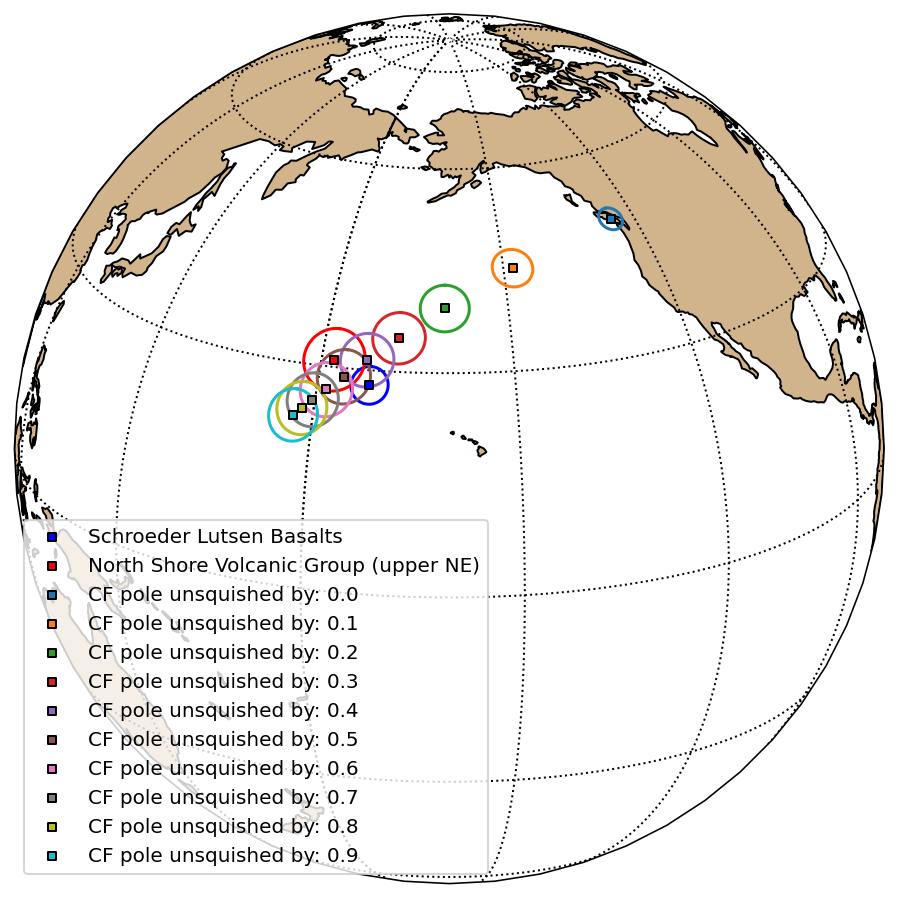

In [14]:
NSVG_NE_plon = 181.7
NSVG_NE_plat = 31.1

CF_lat = 47.7
CF_lon = -90.44

    
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)

ipmag.plot_pole(map_axis,188,28,2.5,label='Schroeder Lutsen Basalts', marker='s',color='Blue')
ipmag.plot_pole(map_axis,182,31,4.2,label='North Shore Volcanic Group (upper NE)',marker='s',color='Red')

for i, mean_dir in enumerate(CF_undquished_mean_list):
    plon, plat, dp, dm = pmag.dia_vgp(mean_dir['dec'], mean_dir['inc'], mean_dir['alpha95'], CF_lat, CF_lon)
    
    ipmag.plot_pole(map_axis,plon,plat, mean_dir['alpha95'],label='CF pole unsquished by: '+ str(i/len(CF_undquished_mean_list)),
               marker='s',color='C'+str(i))

plt.legend()
plt.show()

In [15]:
ht_inc = 28.2
mt_inc = 40.1
exp_inc = 41.7 

tan of inclination  = f * (tan field inclination) 

In [16]:
flattening = np.tan(np.deg2rad(ht_inc))/np.tan(np.deg2rad(exp_inc))
flattening

0.6018124067106355

In [17]:
strat_heights = pd.read_csv('../data/specimen_strat_height.csv')
strat_heights.head()

,sample_name,strat_level
0,1a,1.1
1,2a,1.5
2,3a,1.8
3,4a,2.2
4,5a,2.6


## Plot stratigraphic heights of samples

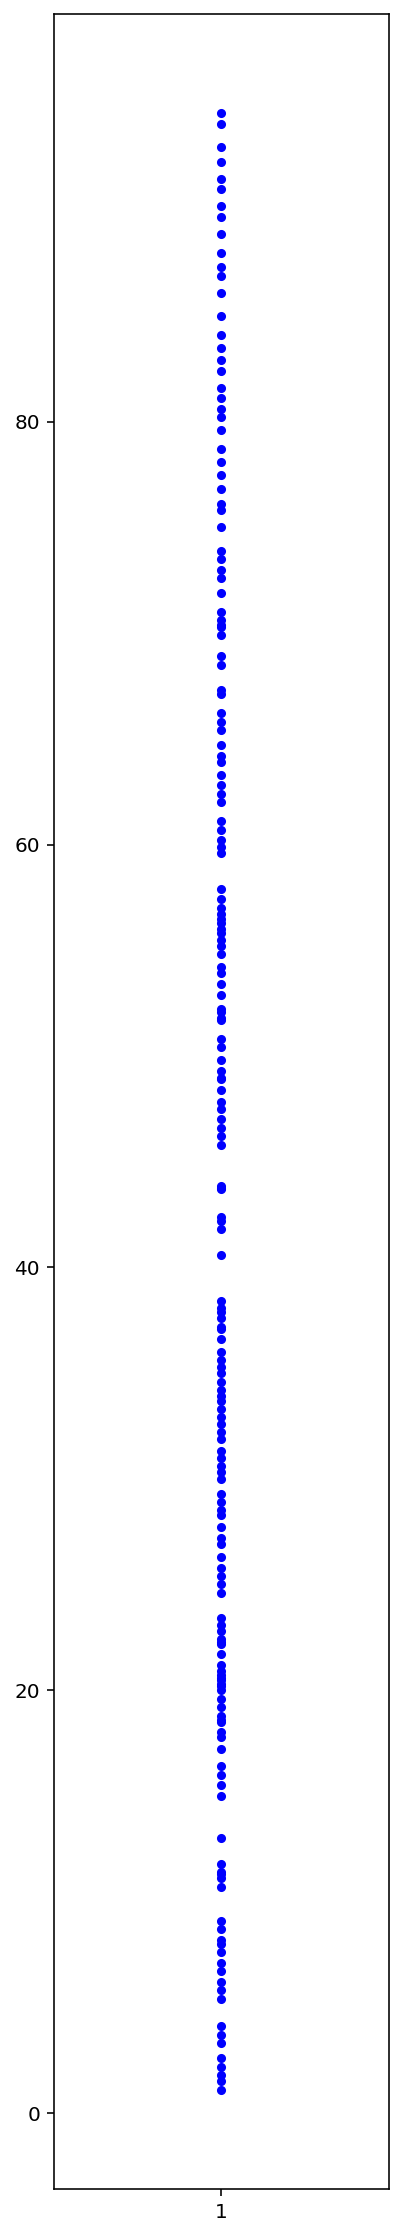

In [18]:
ones = ['1' for i in range(len(strat_heights))]
heights = plt.figure(figsize=(3,20))
plt.scatter(ones,strat_heights['strat_level'], s=50, color='blue', marker ='.')
plt.show

heights.savefig('heights.pdf')

## Plot theoretical expected inclination vs observed inclination

In [19]:
expected_incs = np.linspace(0,90,91)
expected_incs_rad = expected_incs*(np.pi/180)
measured_inc_f_9 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.9)
measured_inc_f_8 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.8)
measured_inc_f_7 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.7)
measured_inc_f_6 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.6)
measured_inc_f_5 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.5)
measured_inc_f_4 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.4)
measured_inc_f_3 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.3)
measured_inc_f_2 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.2)
measured_inc_f_1 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.1)
measured_inc_f_05 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.05)

In [93]:
NE_NSVG_inc = 40.3

nsvg_f_9 = ipmag.squish(NE_NSVG_inc,.9)
nsvg_f_8 = ipmag.squish(NE_NSVG_inc,.8)
nsvg_f_7 = ipmag.squish(NE_NSVG_inc,.7)
nsvg_f_6 = ipmag.squish(NE_NSVG_inc,.6)
nsvg_f_5 = ipmag.squish(NE_NSVG_inc,.5)
nsvg_f_4 = ipmag.squish(NE_NSVG_inc,.4)
nsvg_f_3 = ipmag.squish(NE_NSVG_inc,.3)

In [94]:
viridis = cm.get_cmap('viridis', 7)

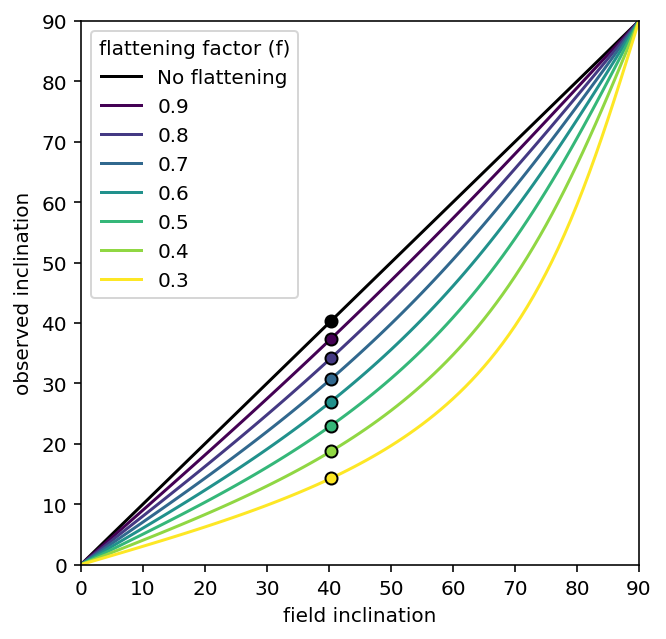

In [101]:
obs_vs_measure_plot = plt.figure(figsize=(5,5))
plt.plot([0,90],[0,90], label='No flattening', color='black')
plt.scatter(NE_NSVG_inc,NE_NSVG_inc,color='black',edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_9, label='0.9', color=viridis(0))
plt.scatter(NE_NSVG_inc,nsvg_f_9,color=viridis(0),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_8, label='0.8', color=viridis(1))
plt.scatter(NE_NSVG_inc,nsvg_f_8,color=viridis(1),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_7, label='0.7', color=viridis(2))
plt.scatter(NE_NSVG_inc,nsvg_f_7,color=viridis(2),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_6, label='0.6', color=viridis(3))
plt.scatter(NE_NSVG_inc,nsvg_f_6,color=viridis(3),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_5, label='0.5', color=viridis(4))
plt.scatter(NE_NSVG_inc,nsvg_f_5,color=viridis(4),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_4, label='0.4', color=viridis(5))
plt.scatter(NE_NSVG_inc,nsvg_f_4,color=viridis(5),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_3, label='0.3', color=viridis(6))
plt.scatter(NE_NSVG_inc,nsvg_f_3,color=viridis(6),edgecolors='black',zorder=100)
#plt.plot(expected_incs,measured_inc_f_2)
#plt.plot(expected_incs,measured_inc_f_1)
#plt.plot(expected_incs,measured_inc_f_05)
#plt.title('Corrected vs Observed Inclination')
plt.legend(title='flattening factor (f)')
plt.xlim(0,90)
plt.ylim(0,90)
plt.xlabel('field inclination')
plt.ylabel('observed inclination')
obs_vs_measure_plot.savefig('obs_vs_measure_plot.pdf', bbox_inches='tight')
plt.show()

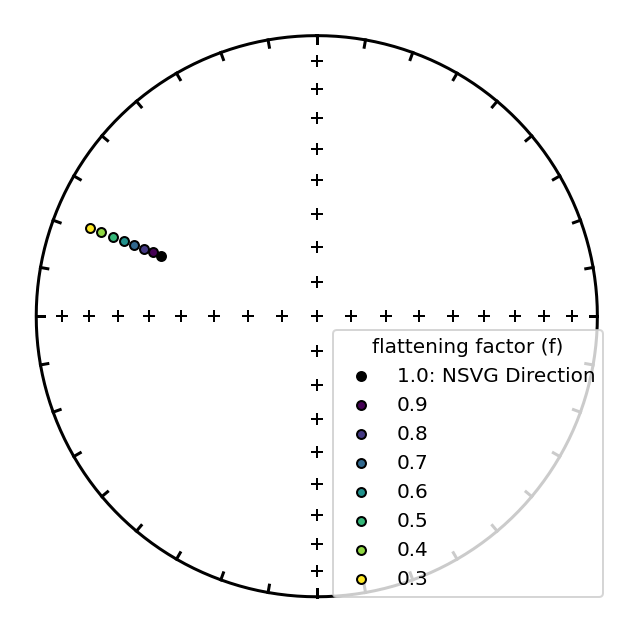

In [109]:
upper_nsvg_shallowing = plt.figure(num=fignum,figsize=(4.5,4.5))
ipmag.plot_net(fignum)
ipmag.plot_di(291.3, 40.3, label='1.0: NSVG Direction' )
ipmag.plot_di(291.3, nsvg_f_9, color=viridis(0), label='0.9',edge='black')
ipmag.plot_di(291.3, nsvg_f_8, color=viridis(1), label='0.8',edge='black')
ipmag.plot_di(291.3, nsvg_f_7, color=viridis(2), label='0.7',edge='black')
ipmag.plot_di(291.3, nsvg_f_6, color=viridis(3), label='0.6',edge='black')
ipmag.plot_di(291.3, nsvg_f_5, color=viridis(4), label='0.5',edge='black')
ipmag.plot_di(291.3, nsvg_f_4, color=viridis(5), label='0.4',edge='black')
ipmag.plot_di(291.3, nsvg_f_3, color=viridis(6), label='0.3',edge='black')
plt.legend(loc=8,title='flattening factor (f)',bbox_to_anchor=(0.75,0.02))
#plt.title('Shallowing of the Upper Northeast Sequence NSVG Direction', size=16)
upper_nsvg_shallowing.savefig('upper_nsvg_shallowing.pdf', bbox_inches='tight')
plt.show()

## Simulate draws from a Fisher distribution and squish them

In [64]:
NSVG_sim = ipmag.fishrot(k=30,n=100,dec=291.3,inc=40.3)
NSVG_sim_dec, NSVG_sim_inc, mag_moment = ipmag.unpack_di_block(NSVG_sim)

NSVG_sim_inc_squished = ipmag.squish(NSVG_sim_inc, 0.6)

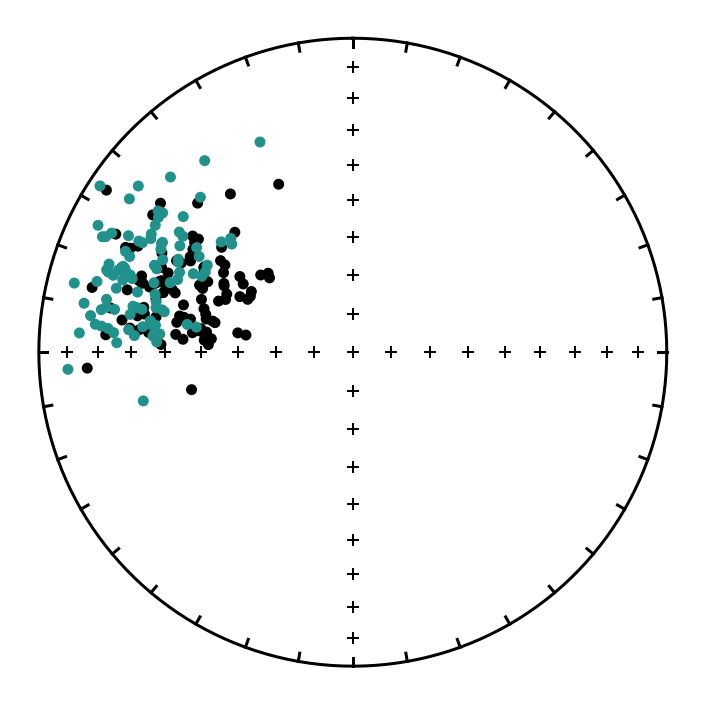

In [65]:
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(NSVG_sim_dec, NSVG_sim_inc)
ipmag.plot_di(NSVG_sim_dec, NSVG_sim_inc_squished,color=viridis(3))

In [77]:
NSVG_sim_mean = ipmag.fisher_mean(NSVG_sim_dec, NSVG_sim_inc)
NSVG_sim_mean

{'dec': 290.61111589039854,
 'inc': 41.757815874881665,
 'n': 100,
 'r': 96.64491654073674,
 'k': 29.50746269117832,
 'alpha95': 2.6464641143213856,
 'csd': 14.911422838649306}

In [78]:
NSVG_sim_squished_mean = ipmag.fisher_mean(NSVG_sim_dec, NSVG_sim_inc_squished)
NSVG_sim_squished_mean

{'dec': 290.68787910572394,
 'inc': 28.97831477035175,
 'n': 100,
 'r': 96.75577394479359,
 'k': 30.51575269889792,
 'alpha95': 2.600875973966668,
 'csd': 14.663004759181195}

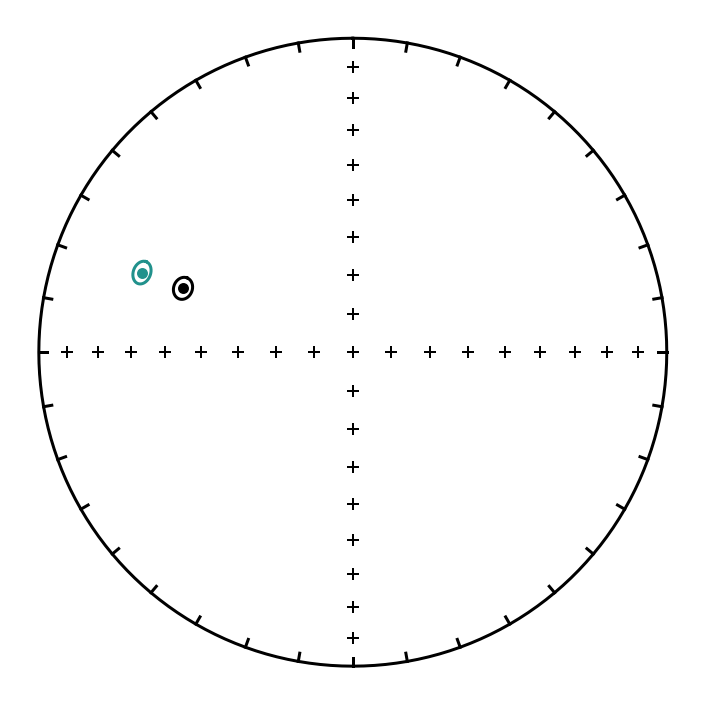

In [76]:
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di_mean(NSVG_sim_mean['dec'],NSVG_sim_mean['inc'],NSVG_sim_mean['alpha95'])
ipmag.plot_di_mean(NSVG_sim_squished_mean['dec'],NSVG_sim_squished_mean['inc'],
                   NSVG_sim_squished_mean['alpha95'],color=viridis(3))